<a href="https://colab.research.google.com/github/Gireesh-Guntupalli/football-playaer-detection-using-yolov9/blob/main/Custom_dataset_training_with_YOLOv9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Checing GPU connection

(using collab free T4 gpu version here)

In [20]:
## Checking GPU connection
!nvidia-smi

Fri Aug 30 15:29:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Imports

In [21]:
from IPython.display import Image
import roboflow

In [22]:
## Current working directory

import os
HOME= os.getcwd()
print(HOME)

/content/yolov9


## Cloning and installing YOLOv9 Repo

In [23]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107 (from 1)
Receiving objects: 100% (325/325), 2.23 MiB | 22.00 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9/yolov9


#### Dowloading yolov9-e model weights from [repository](https://github.com/WongKinYiu/yolov9).

In [24]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt

In [25]:
## checking if all weights are downlaoded
!ls -la {HOME}/weights

total 187244
drwxr-xr-x  2 root root      4096 Aug 30 15:29 .
drwxr-xr-x 16 root root      4096 Aug 30 15:29 ..
-rw-r--r--  1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r--  1 root root 140217688 Feb 18  2024 yolov9-e.pt


## Sample Image for inferring the model

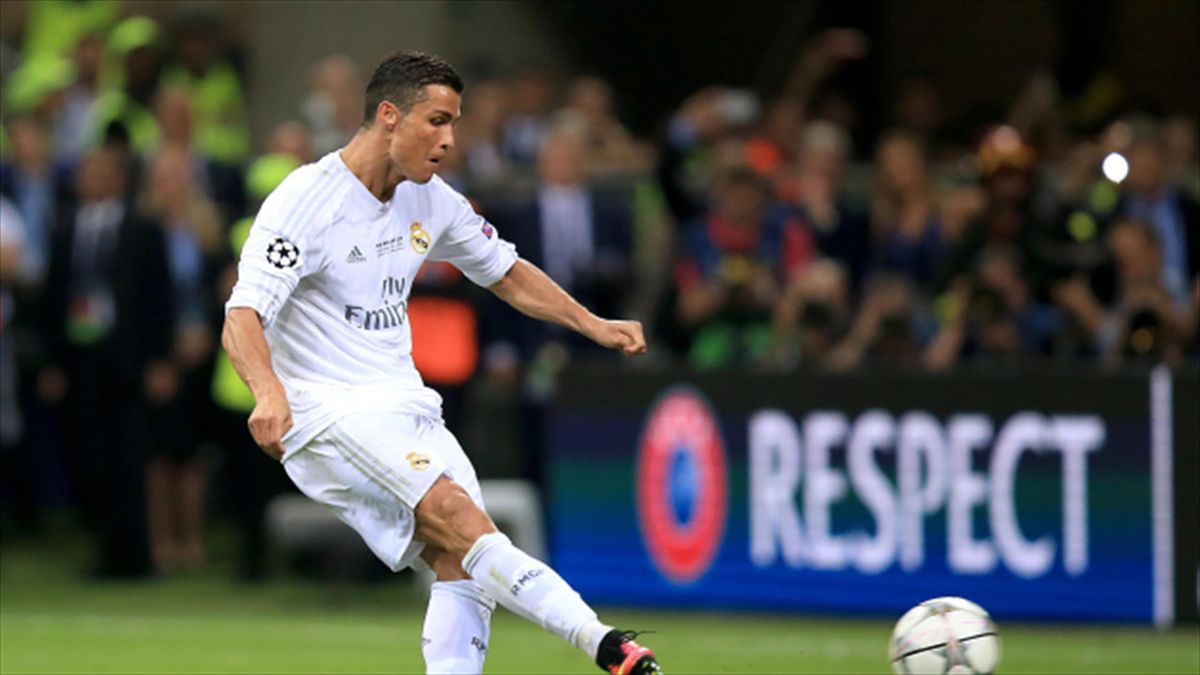

In [26]:
SOURCE_IMAGE_PATH = f"/content/test_sample.jpg"

Image(filename=SOURCE_IMAGE_PATH, width=600)

#### OD on anove model using obtained pretrained model

In [27]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.5 --source /content/test_sample.jpg --device 0

detect: weights=['/content/yolov9/weights/yolov9-e.pt'], source=/content/test_sample.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value f

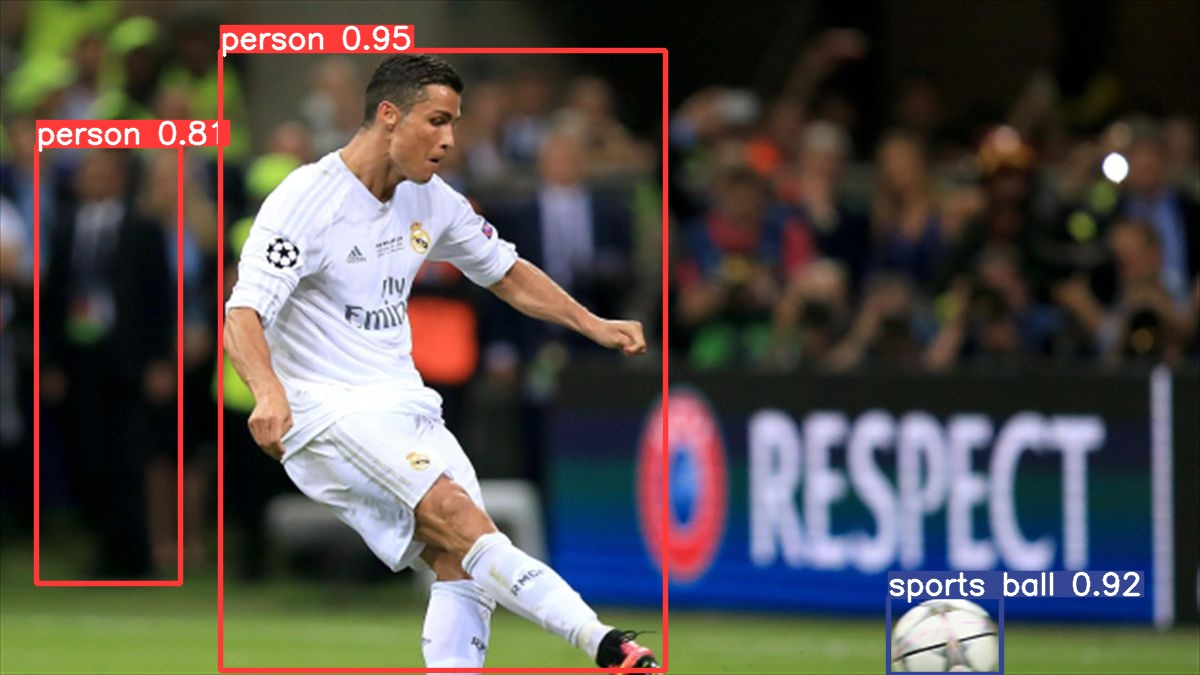

In [28]:
from IPython.display import Image

Image(filename=f"/content/yolov9/runs/detect/exp/test_sample.jpg", width=600)

## Training on custom dataset

#### using [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset from [Roboflow Universe](https://universe.roboflow.com)

In [29]:
%cd {HOME}/yolov9

/content/yolov9/yolov9


In [30]:
roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(8)
dataset = version.download("yolov9")

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-8 in yolov9:: 100%|██████████| 522/522 [00:00<00:00, 2043.37it/s]


Here are the parameters passed to `train.py`:

- `--batch 32`: Sets the batch size to 32, meaning 32 images will be processed together in one iteration.
- `--epochs 50`: Sets the number of training epochs to 50, meaning the model will be trained for 50 cycles over the entire dataset.
- `--img 640`: Resizes all training images to 640x640 pixels. Smaller image sizes can speed up training, but might reduce accuracy.
- `--device 0`: Specifies the GPU device to use (in this case, the first GPU, 0). Colab provides access to a GPU if enabled in runtime settings.
- `--min-items 0`: Sets the minimum number of items (like bounding boxes or objects) required in an image for training. A value of 0 means no minimum.
- `--close-mosaic 15`: Adjusts mosaic augmentation, a data augmentation technique where four images are combined into one. This helps in generalizing the model better. The number 15 might specify a threshold or probability for applying this augmentation.


 `--weights {HOME}/weights/yolov9-e.pt`: Loads pre-trained weights from a file (`yolov9-e.pt`) located in the weights folder. Starting from pre-trained weights can speed up training and improve model performance.


In [33]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 50 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9/yolov9
2024-08-30 15:31:27.256976: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-30 15:31:27.276875: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-30 15:31:27.283238: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-30 15:31:27.297217: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-30 15:31:28.660471: W 

In [34]:
!ls {HOME}/yolov9/runs/train/exp3/

confusion_matrix.png				     P_curve.png       train_batch2.jpg
events.out.tfevents.1725031889.85513dde1208.11900.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					     R_curve.png       val_batch0_pred.jpg
hyp.yaml					     results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				     results.png       val_batch1_pred.jpg
labels.jpg					     train_batch0.jpg  weights
opt.yaml					     train_batch1.jpg


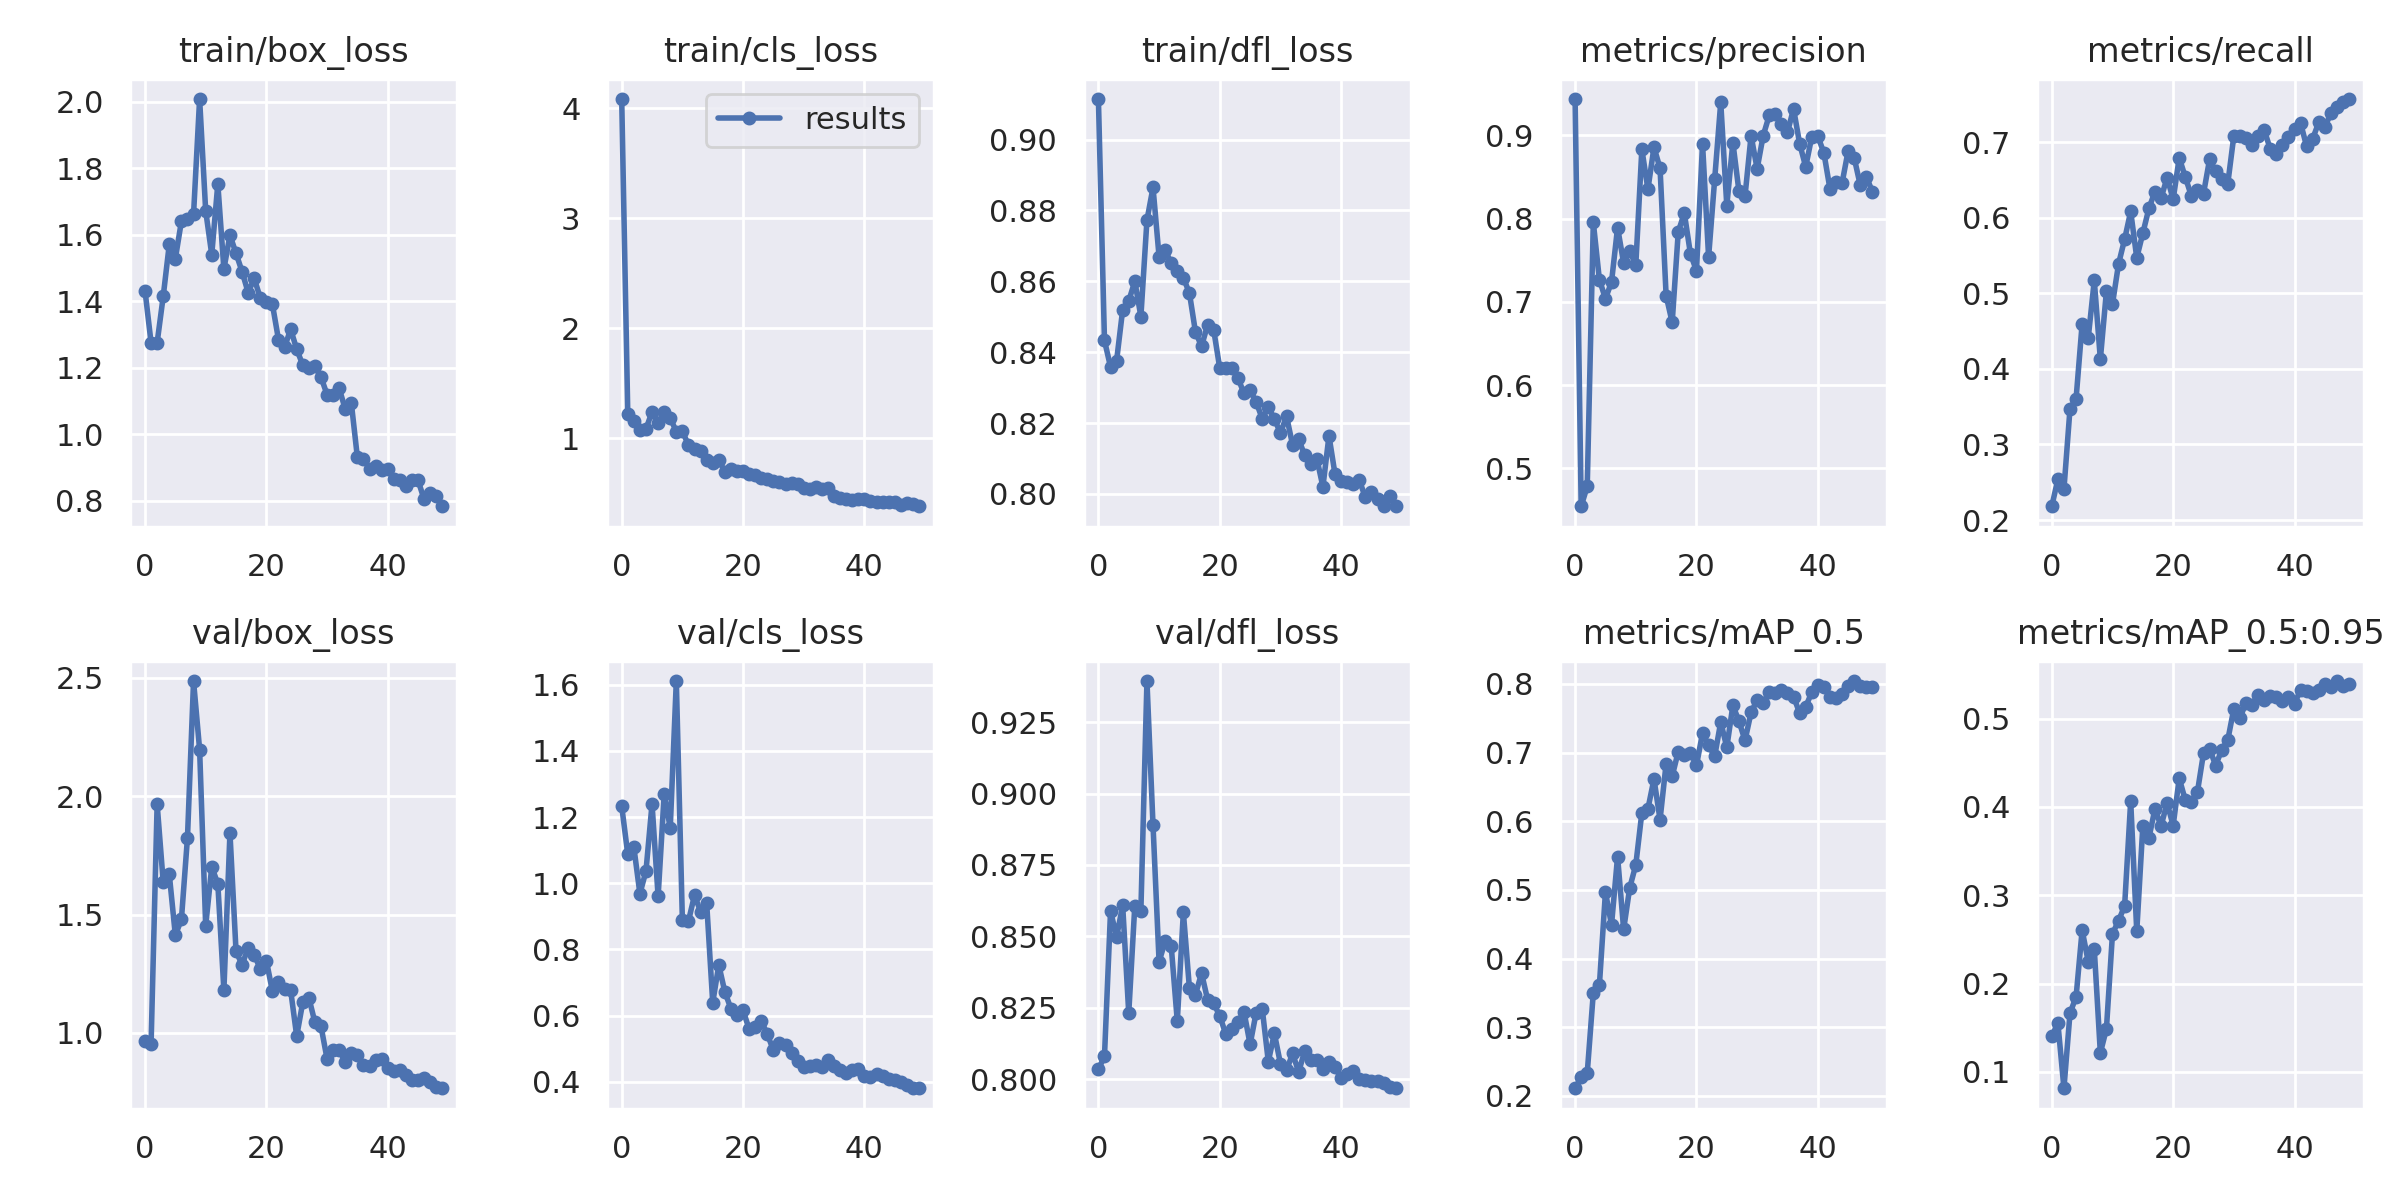

In [35]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp3/results.png", width=1000)

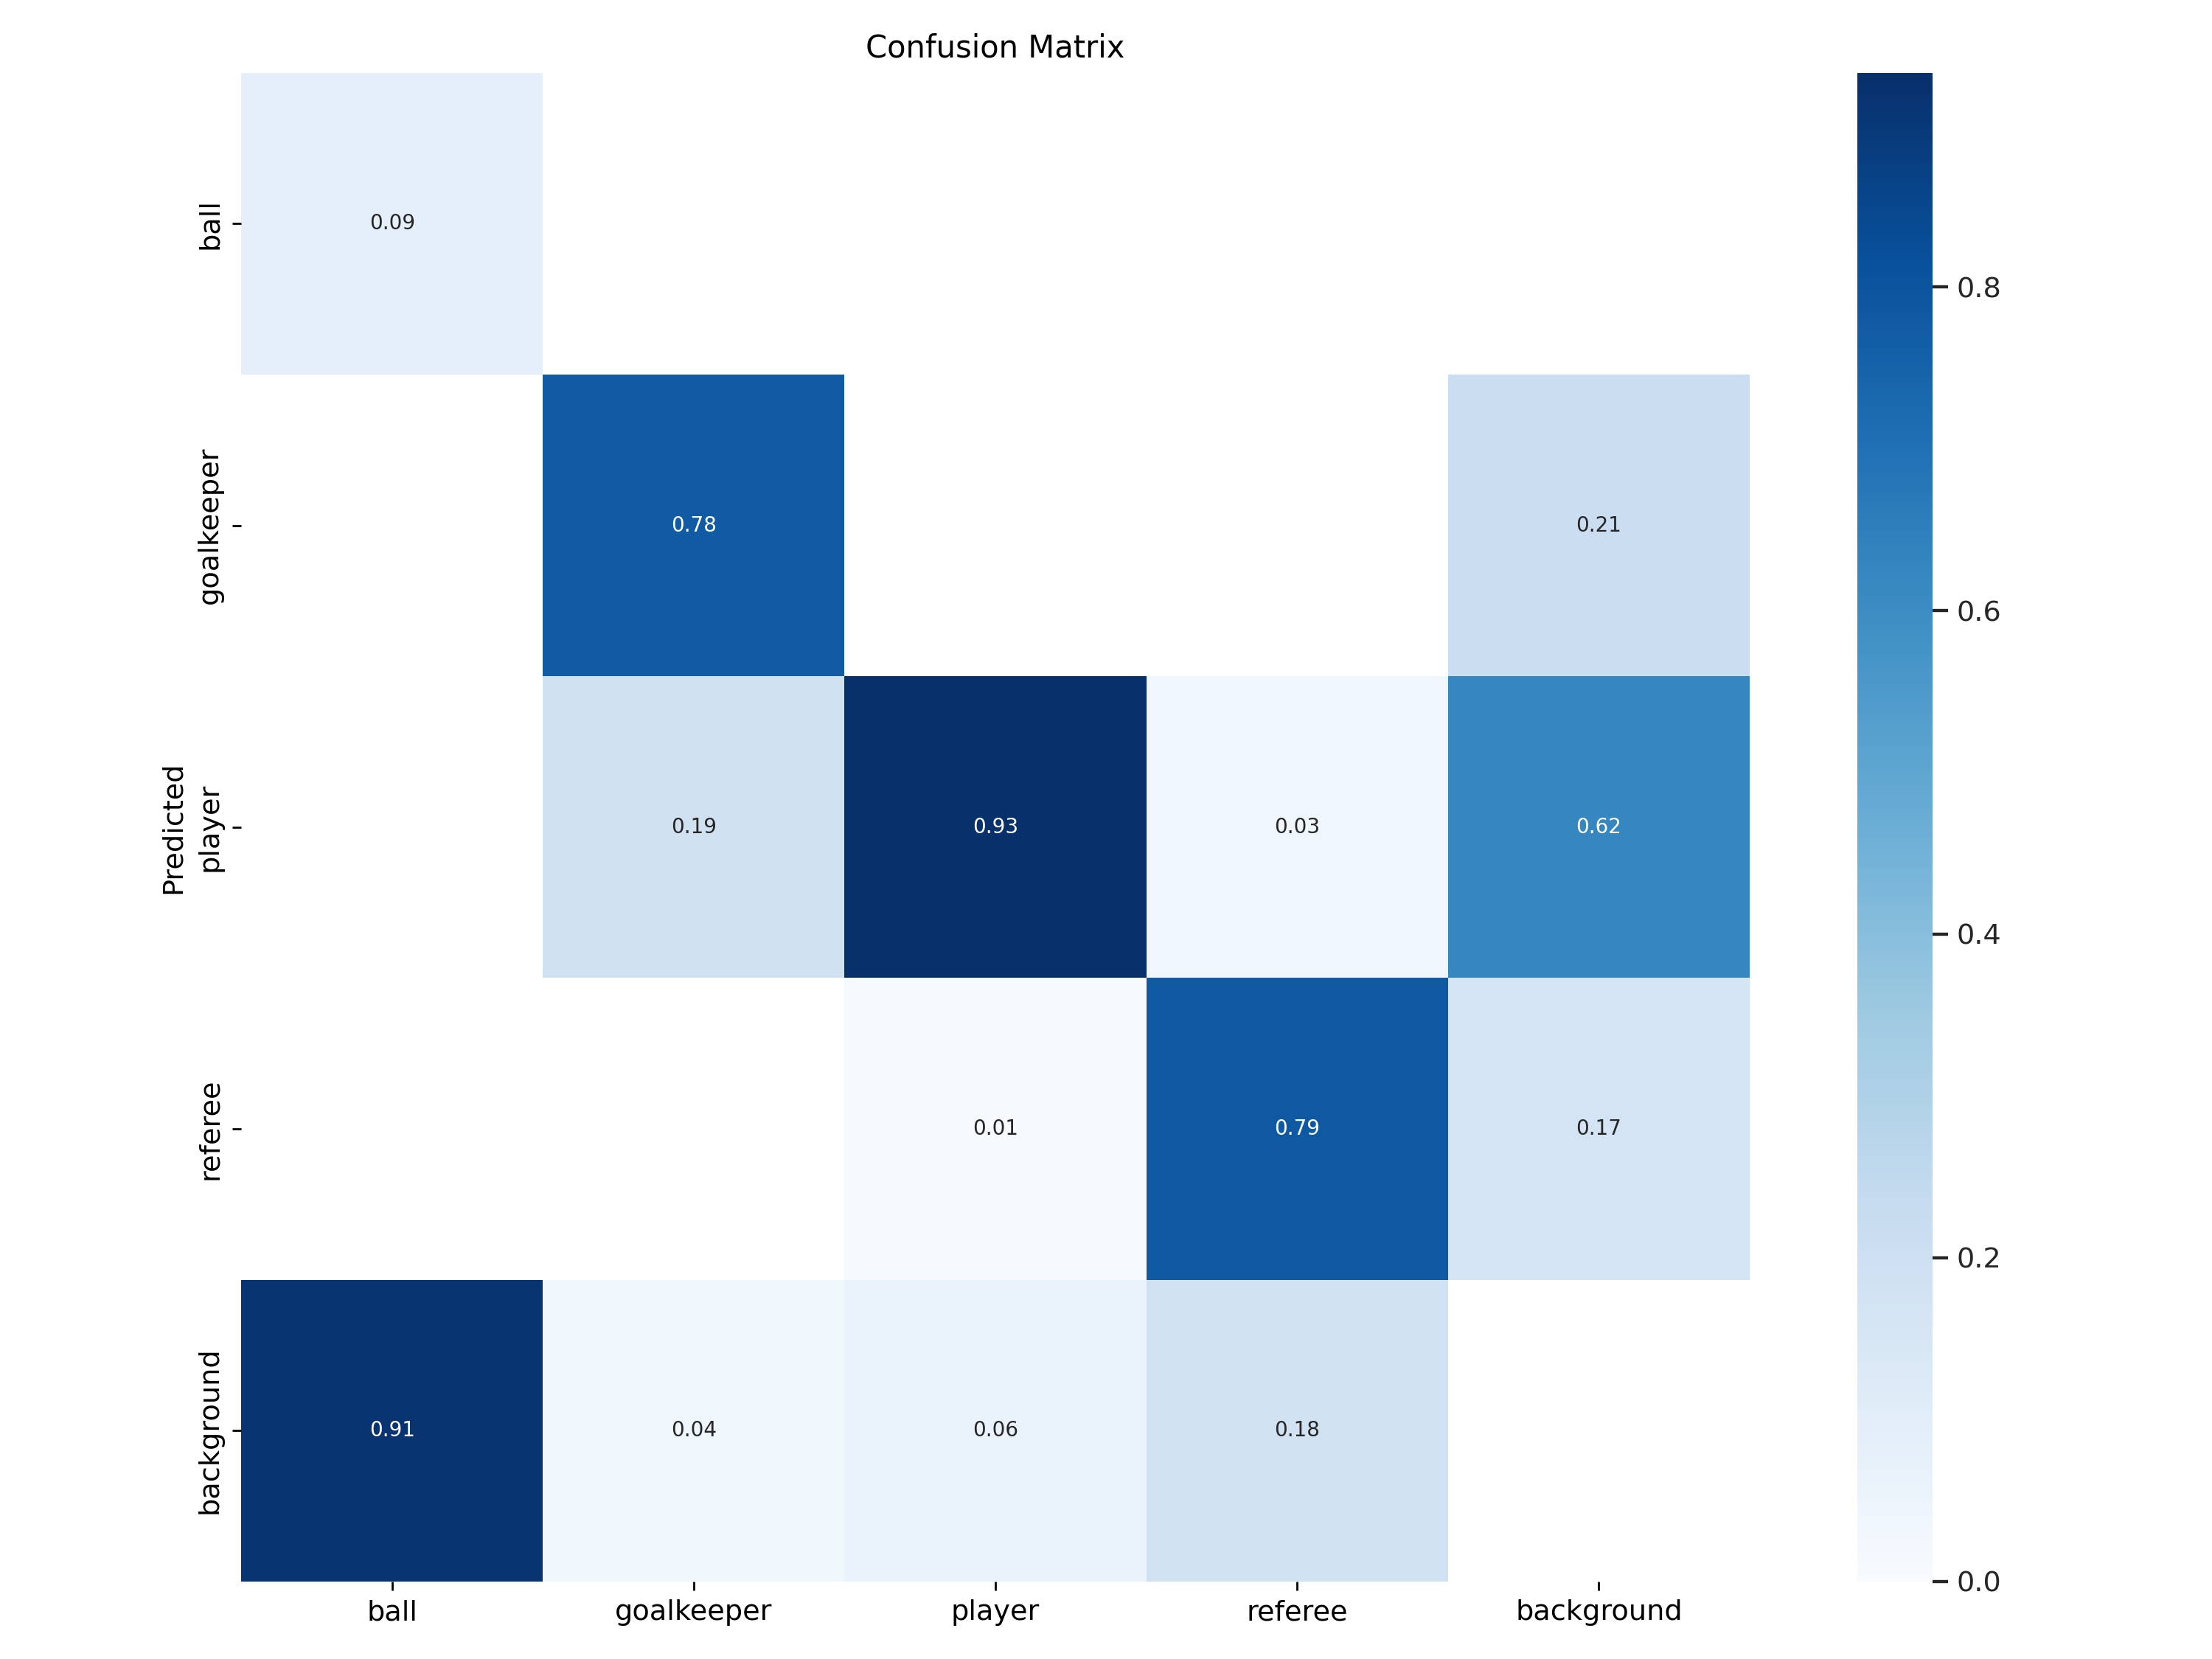

In [37]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp3/confusion_matrix.png", width=1000)

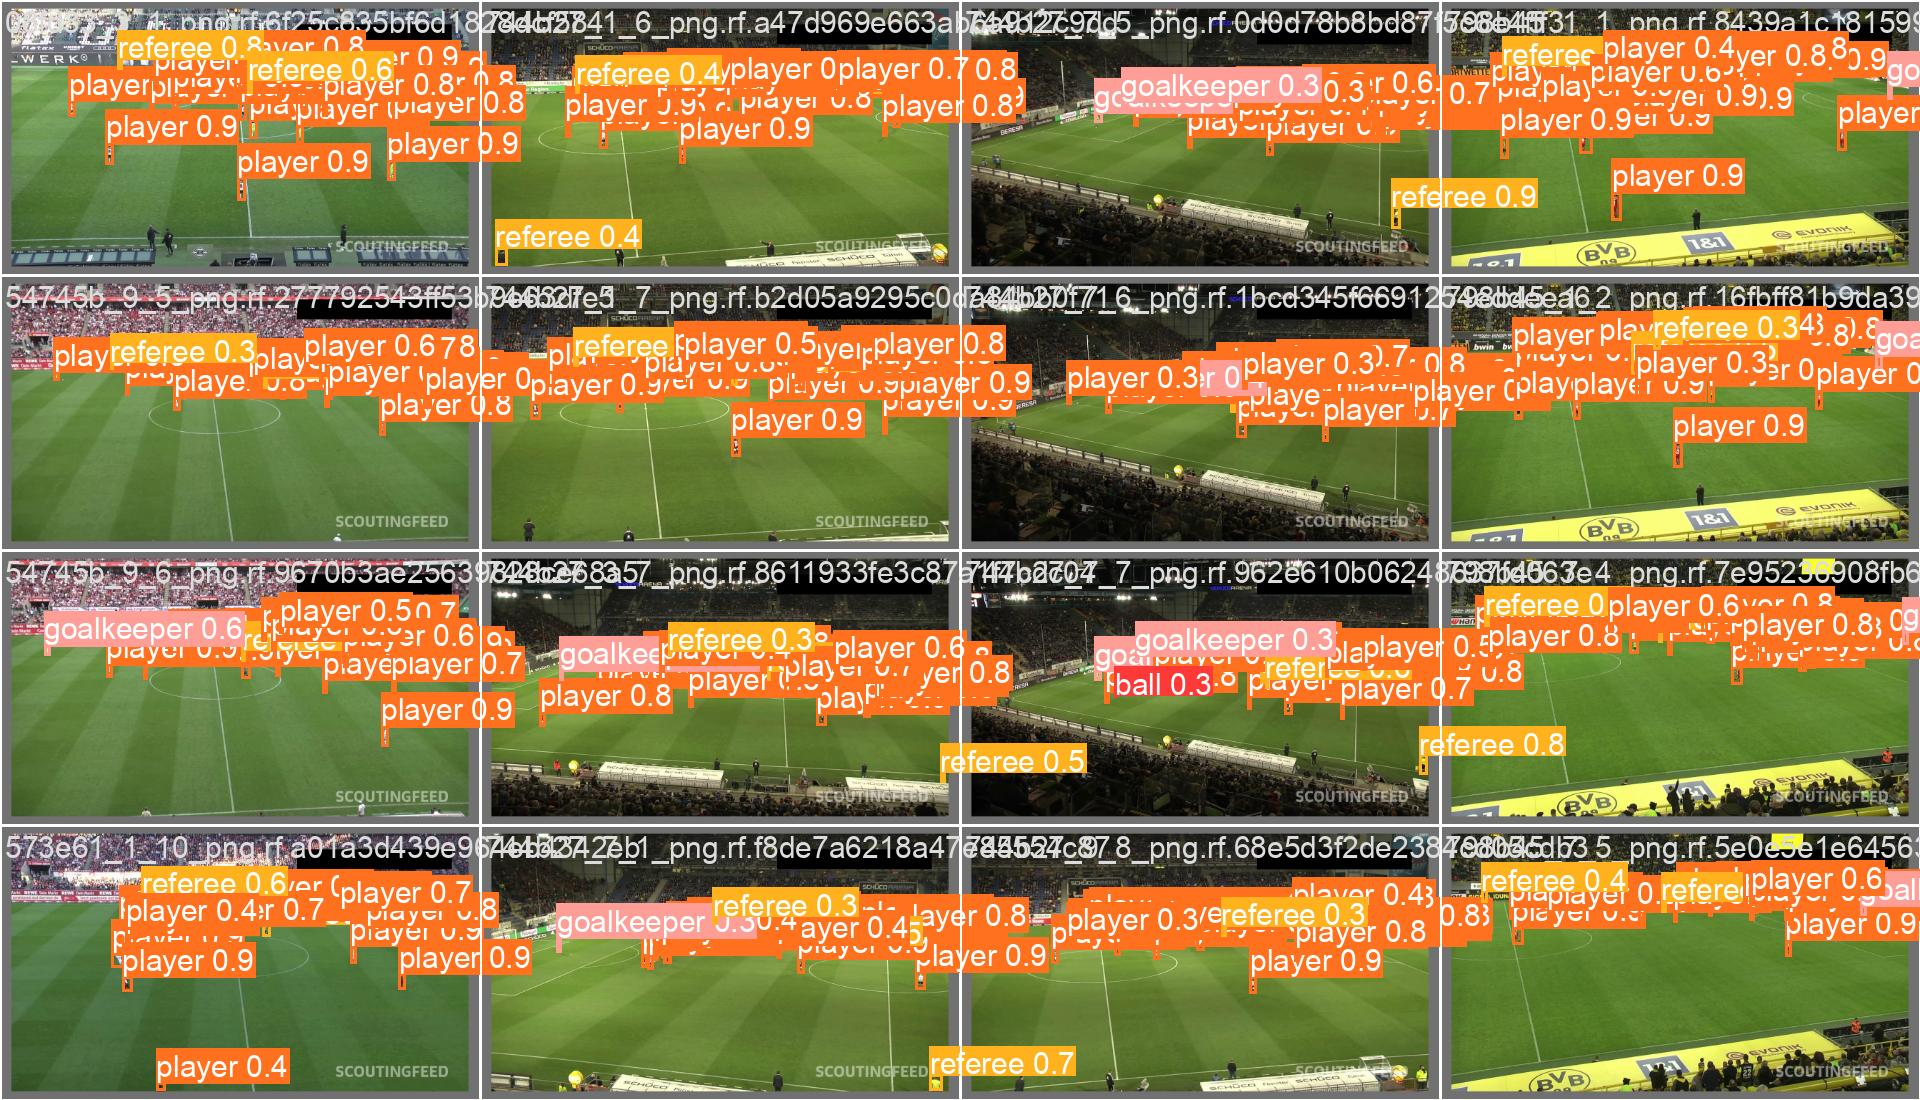

In [39]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp3/val_batch0_pred.jpg", width=1000)

## Validting cutsom model

In [41]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt

/content/yolov9/yolov9
val: data=/content/yolov9/yolov9/football-players-detection-8/data.yaml, weights=['/content/yolov9/yolov9/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will

## Inference with custom model

In [42]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/yolov9/runs/train/exp3/weights/best.pt'], source=/content/yolov9/yolov9/football-players-detection-8/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models

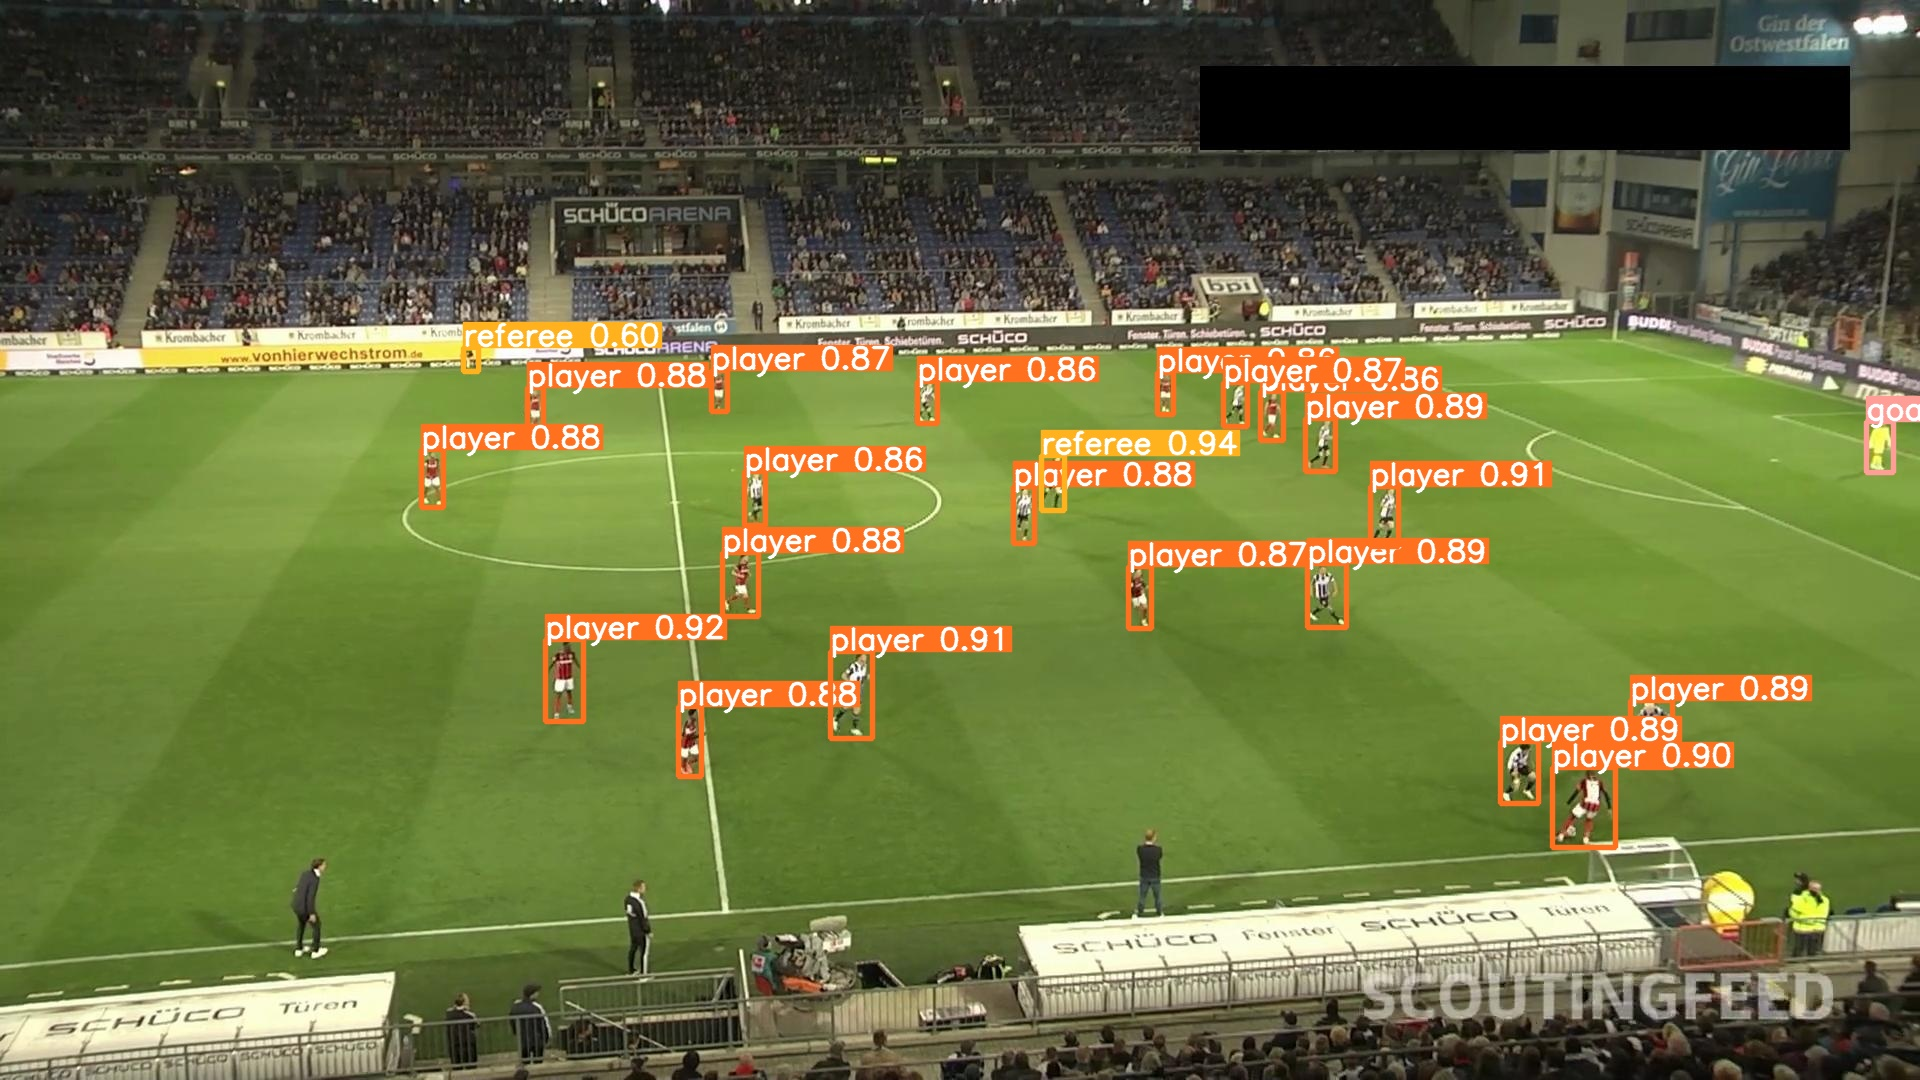

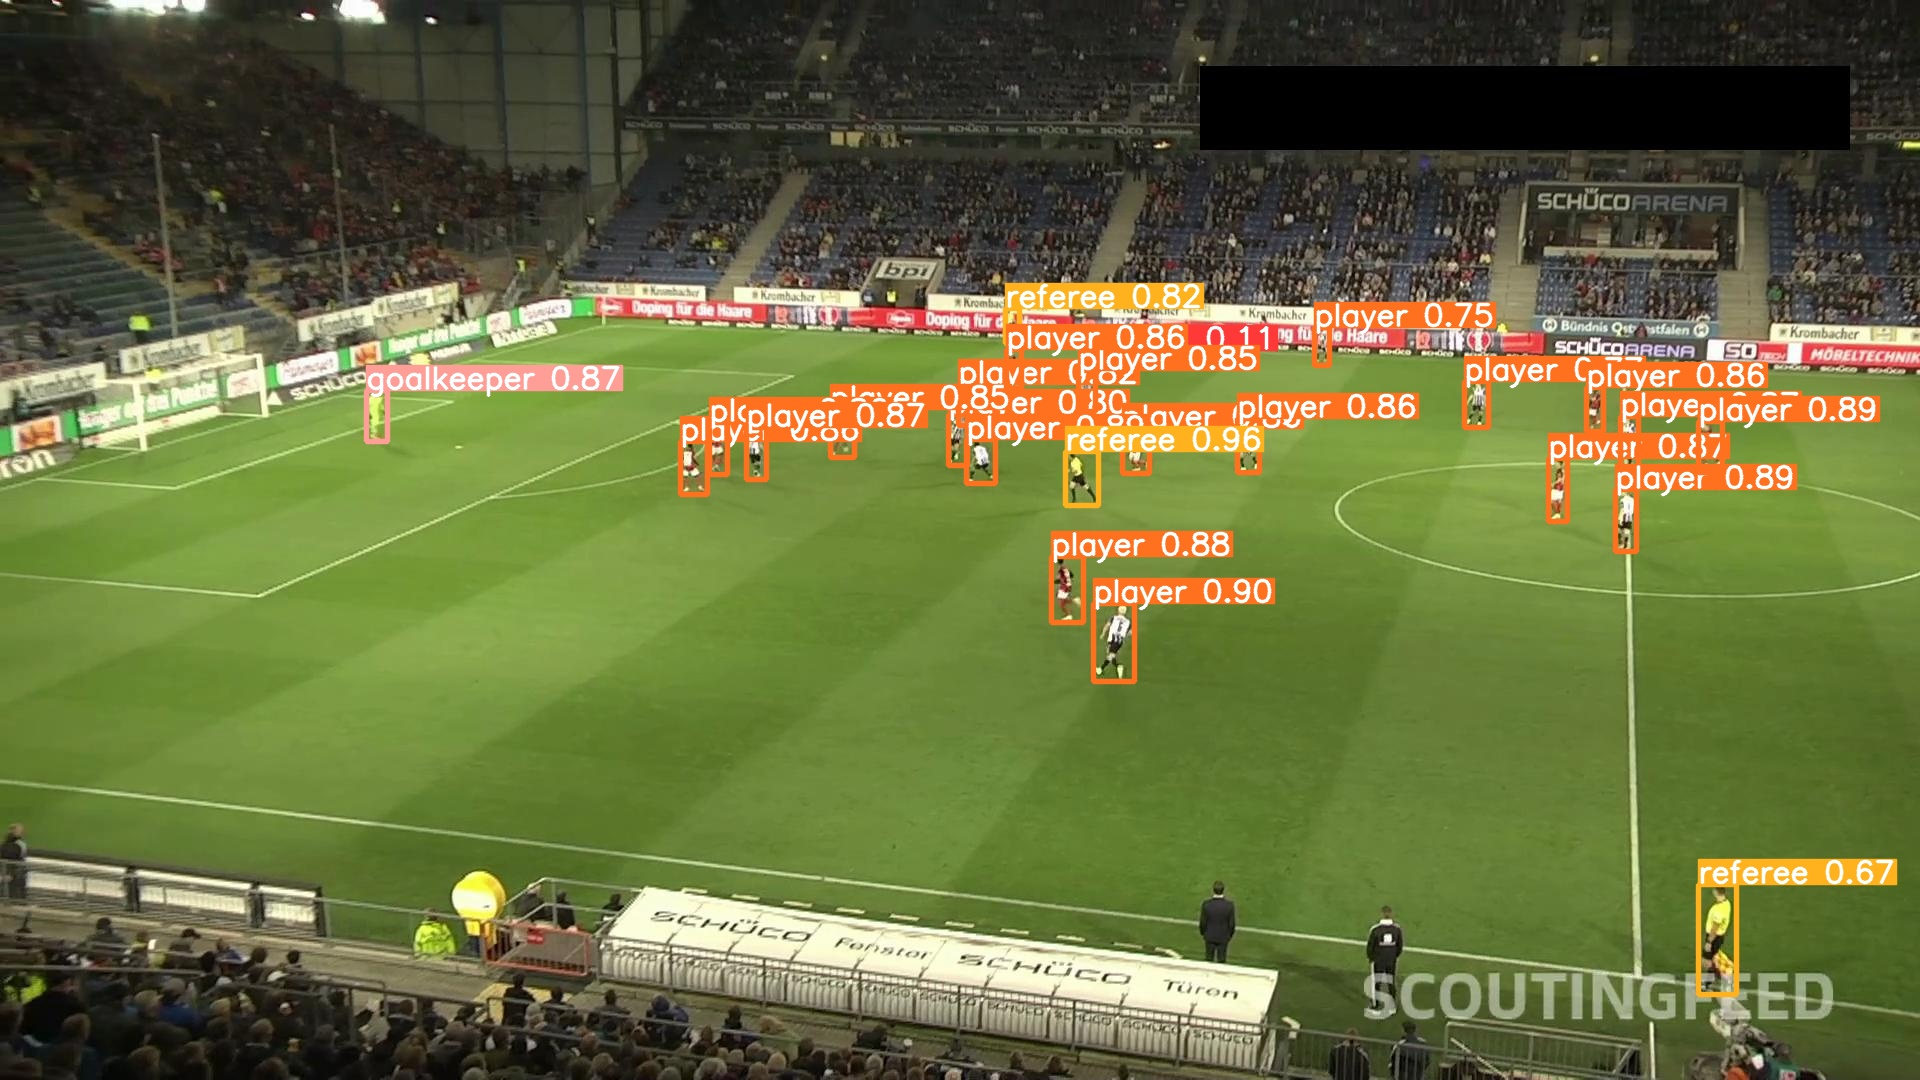

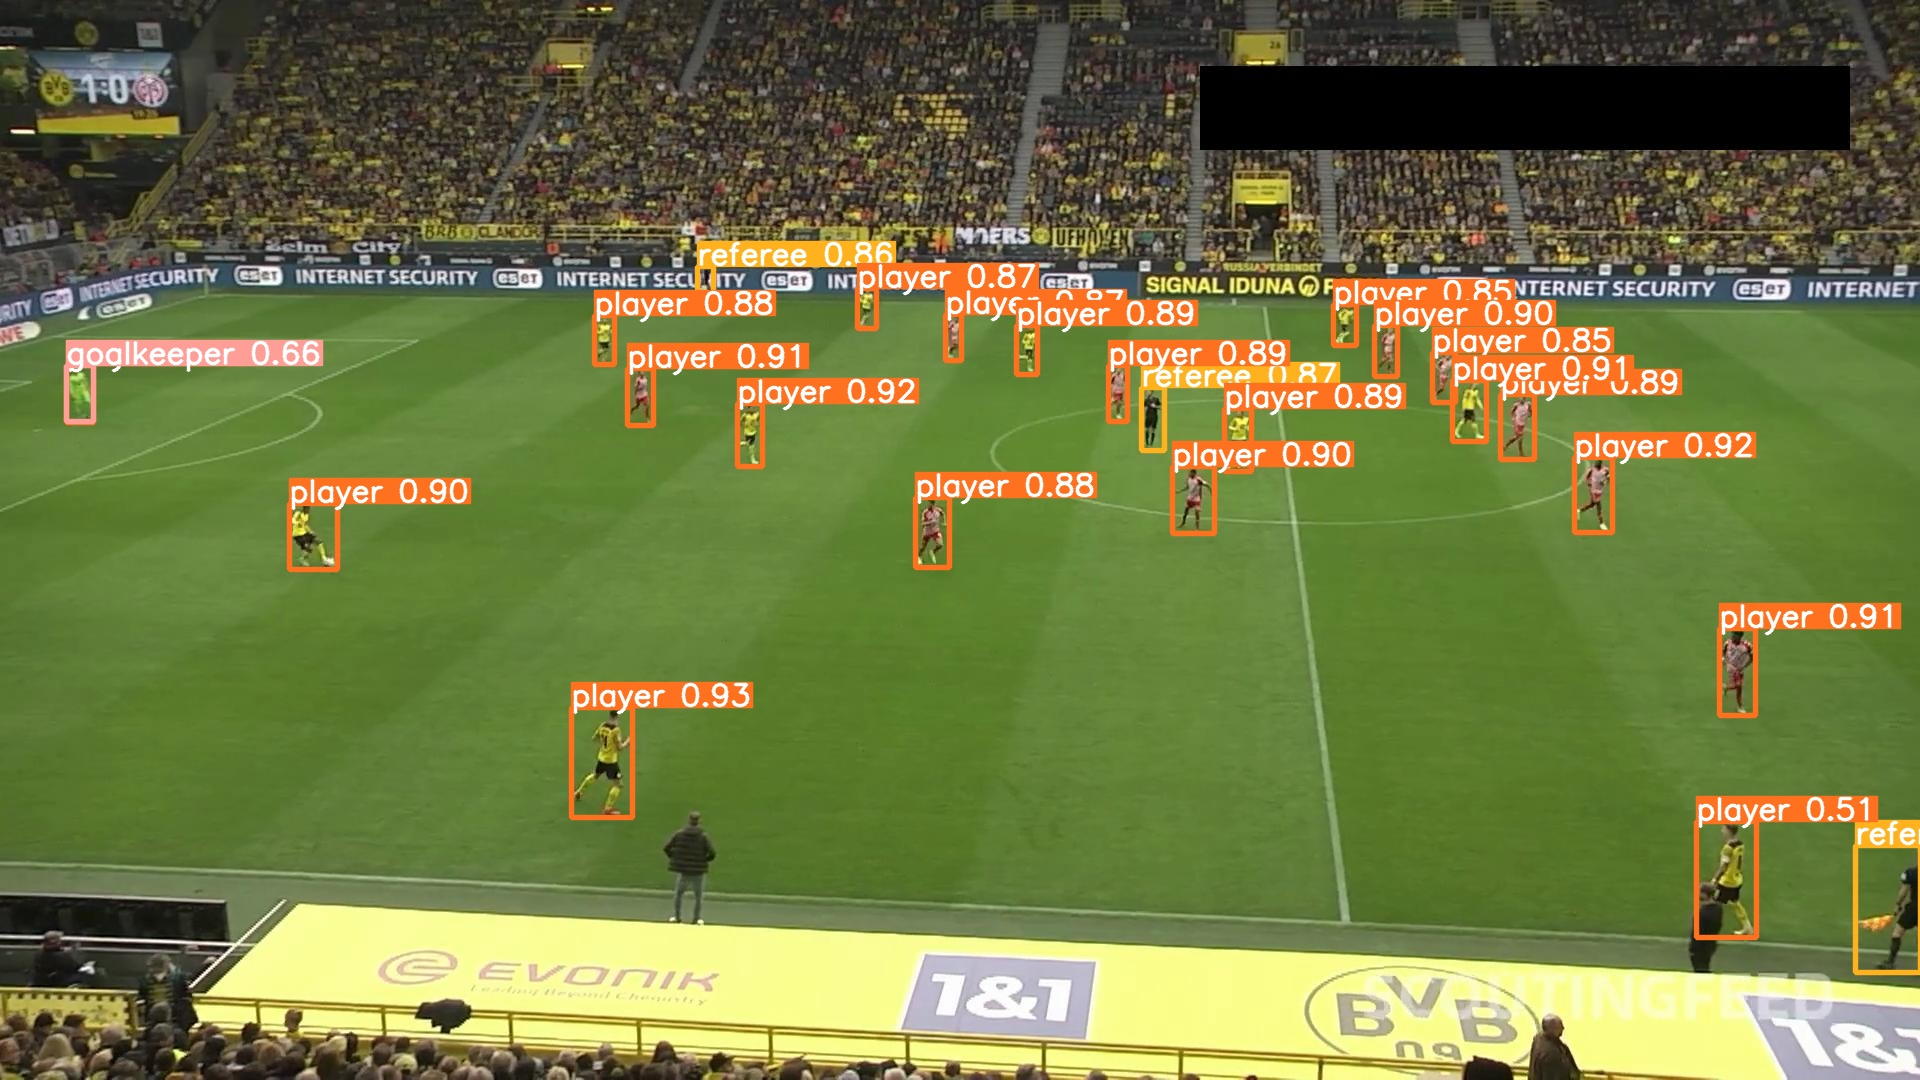

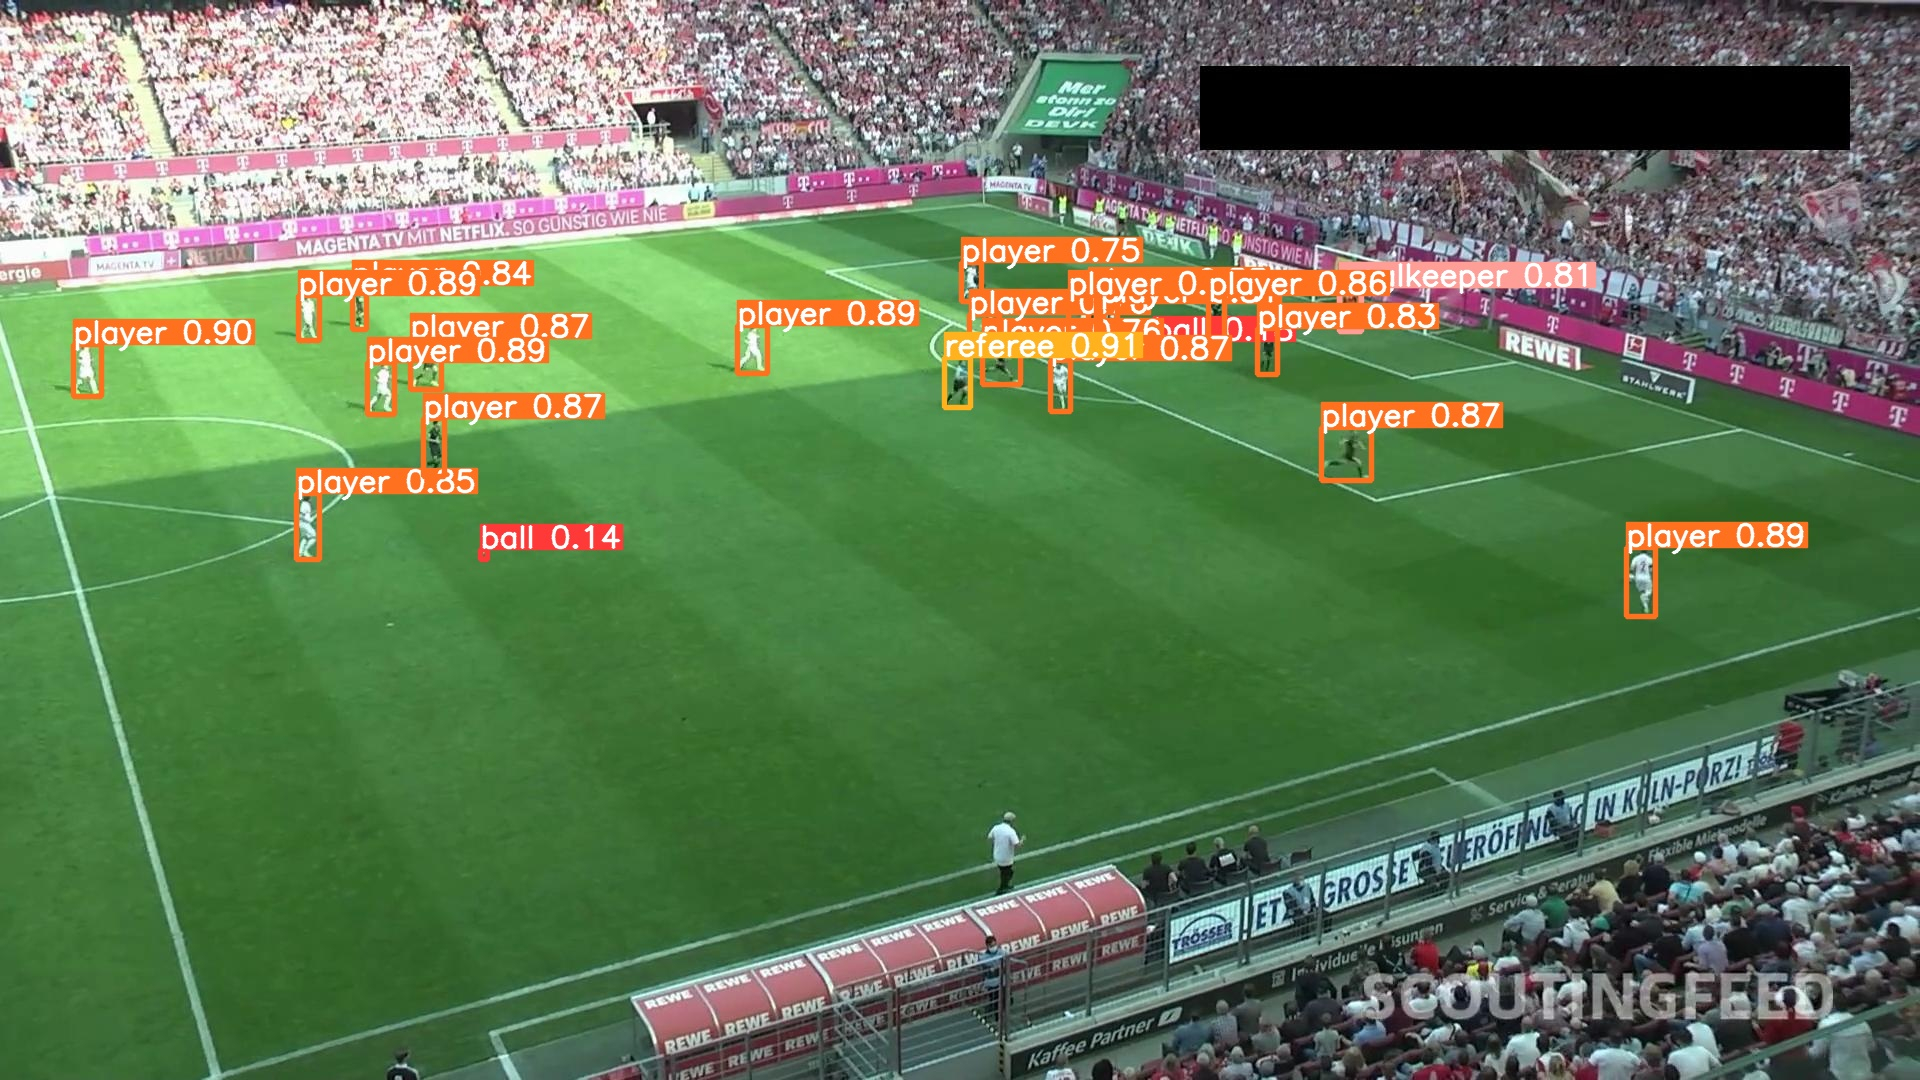

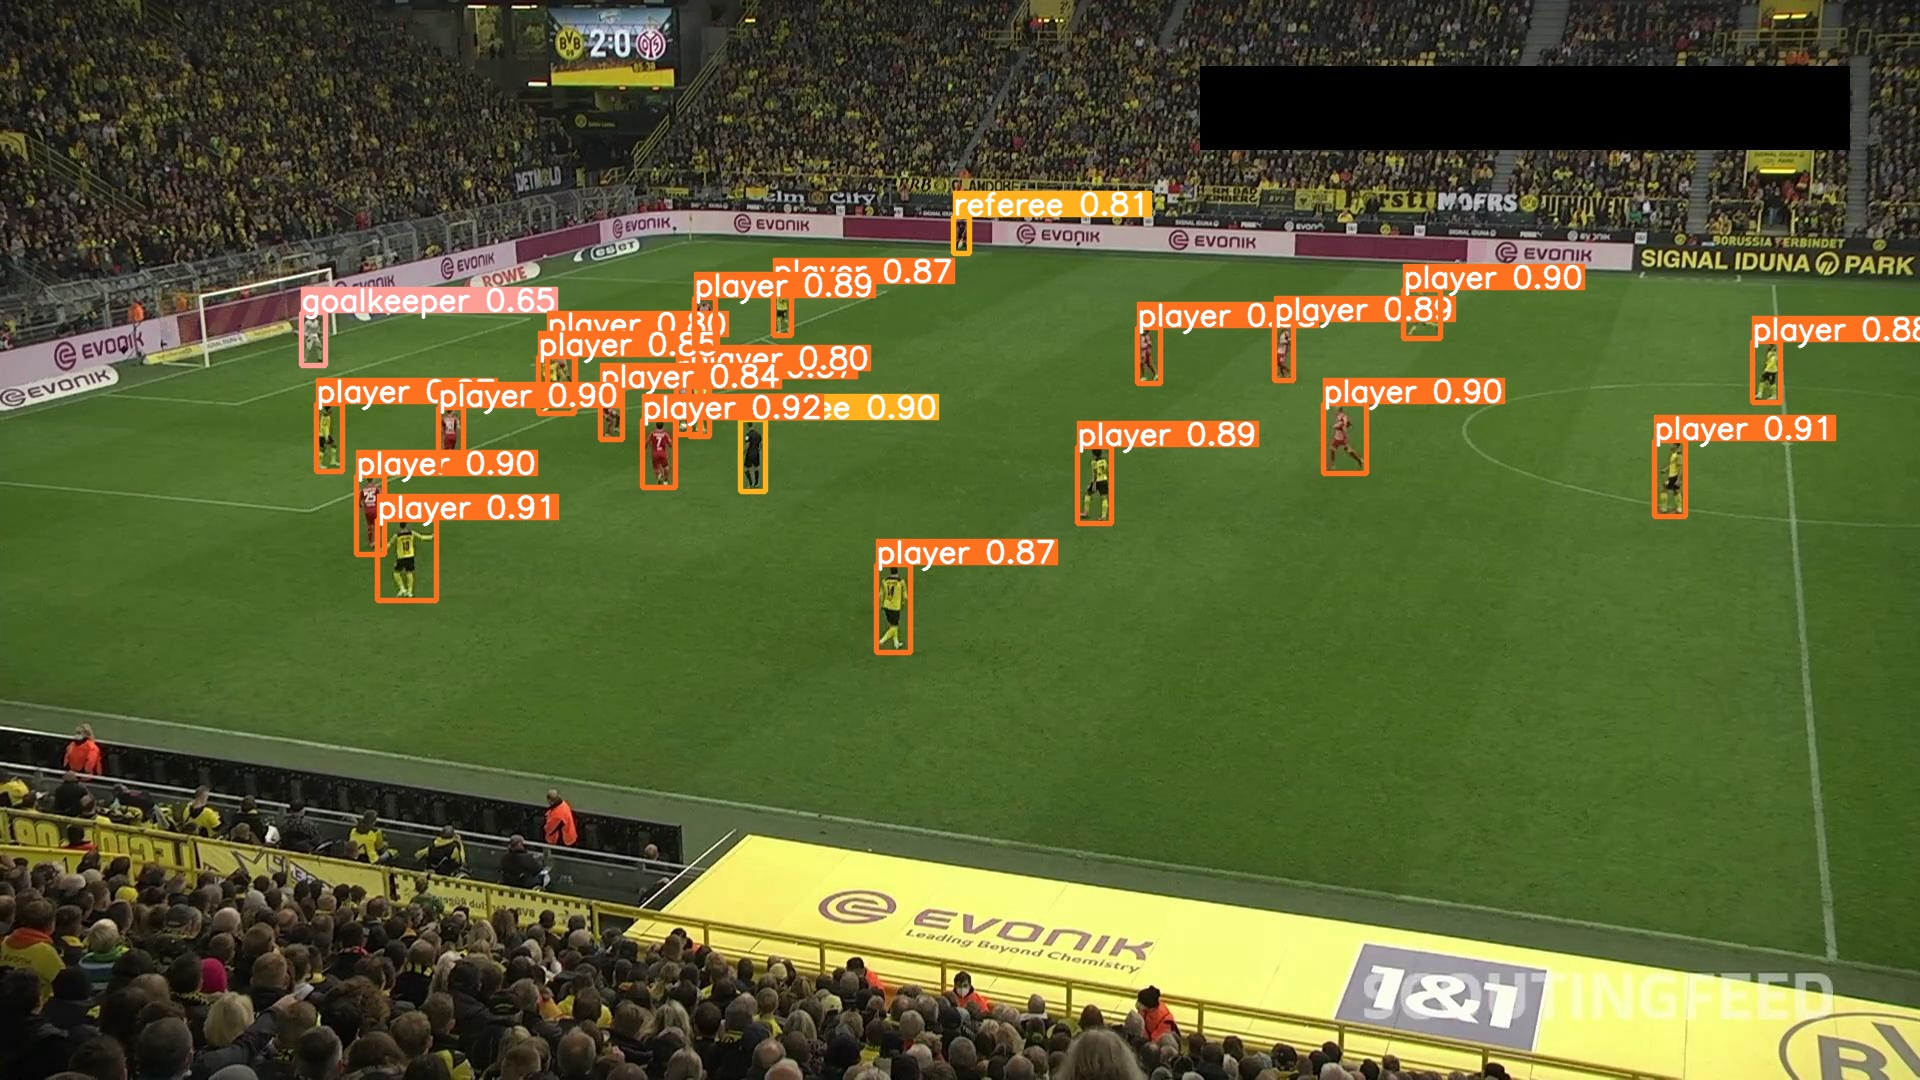

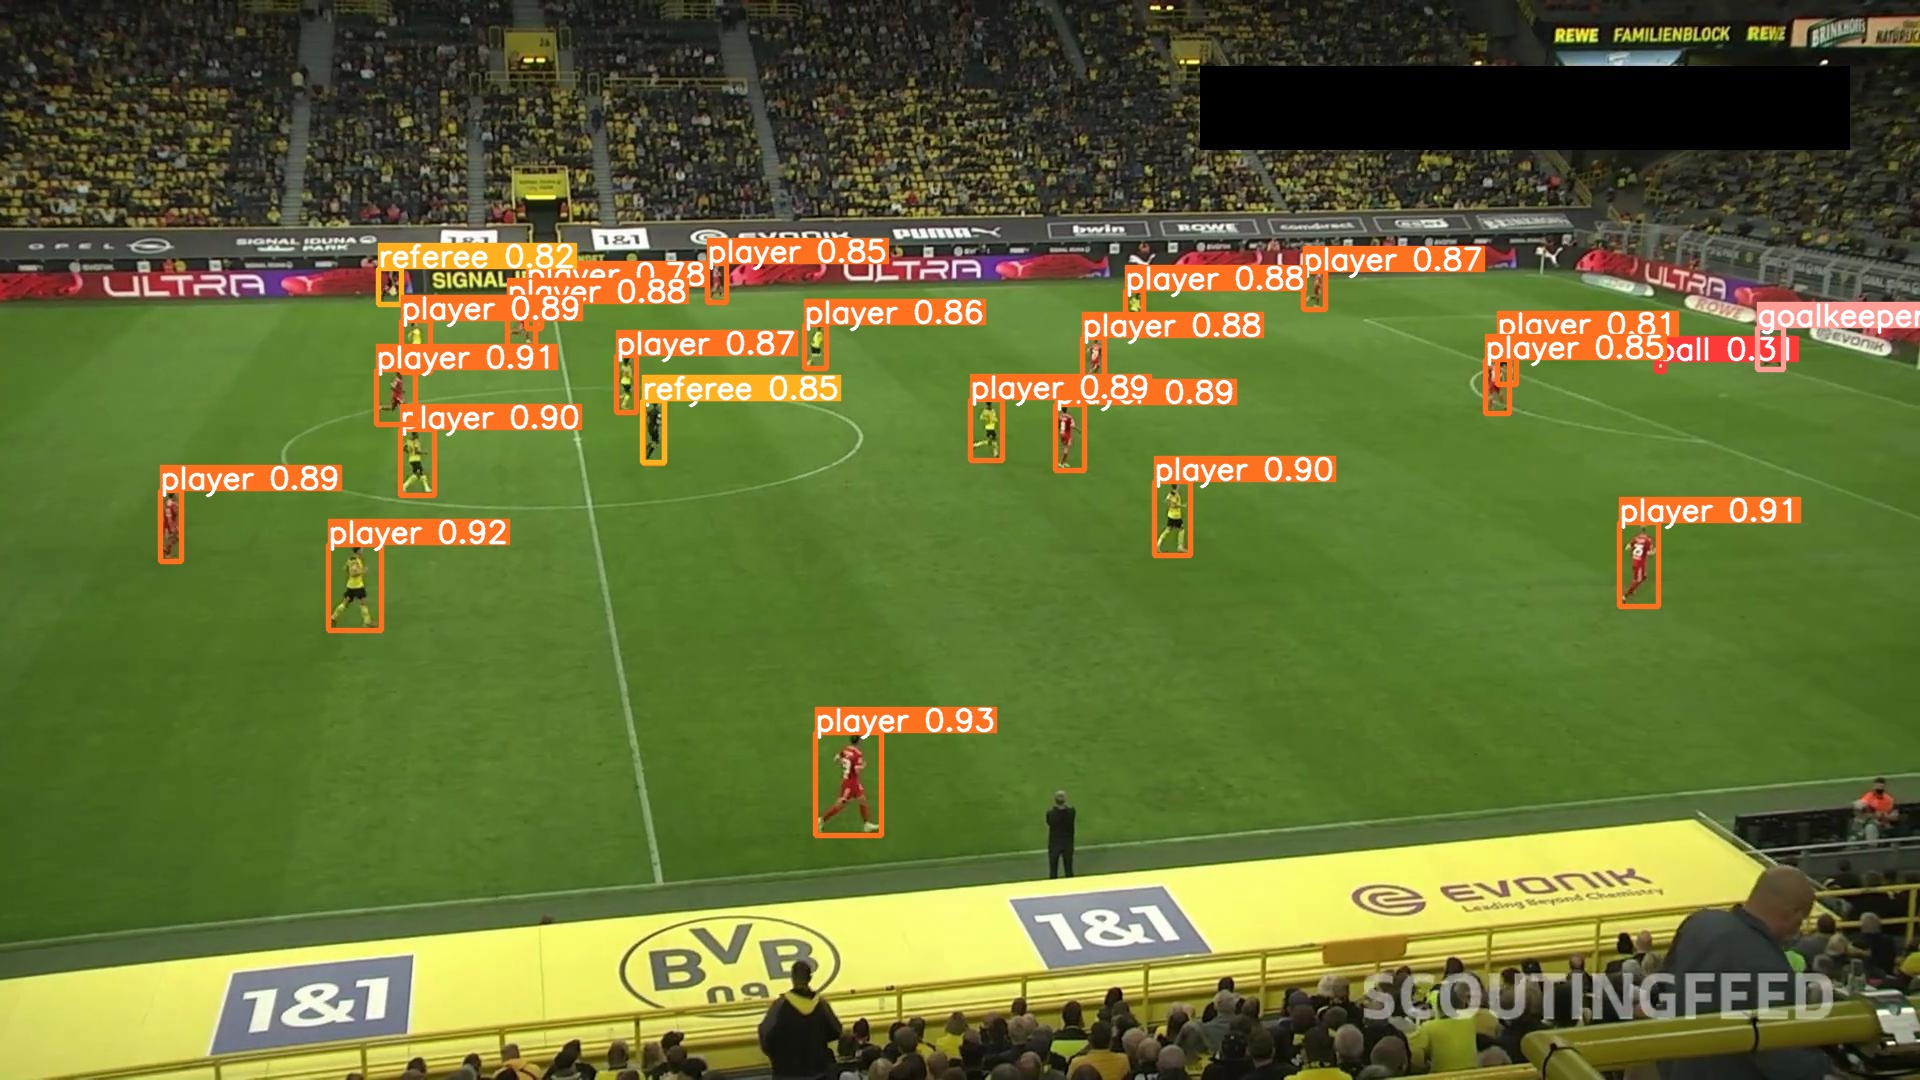

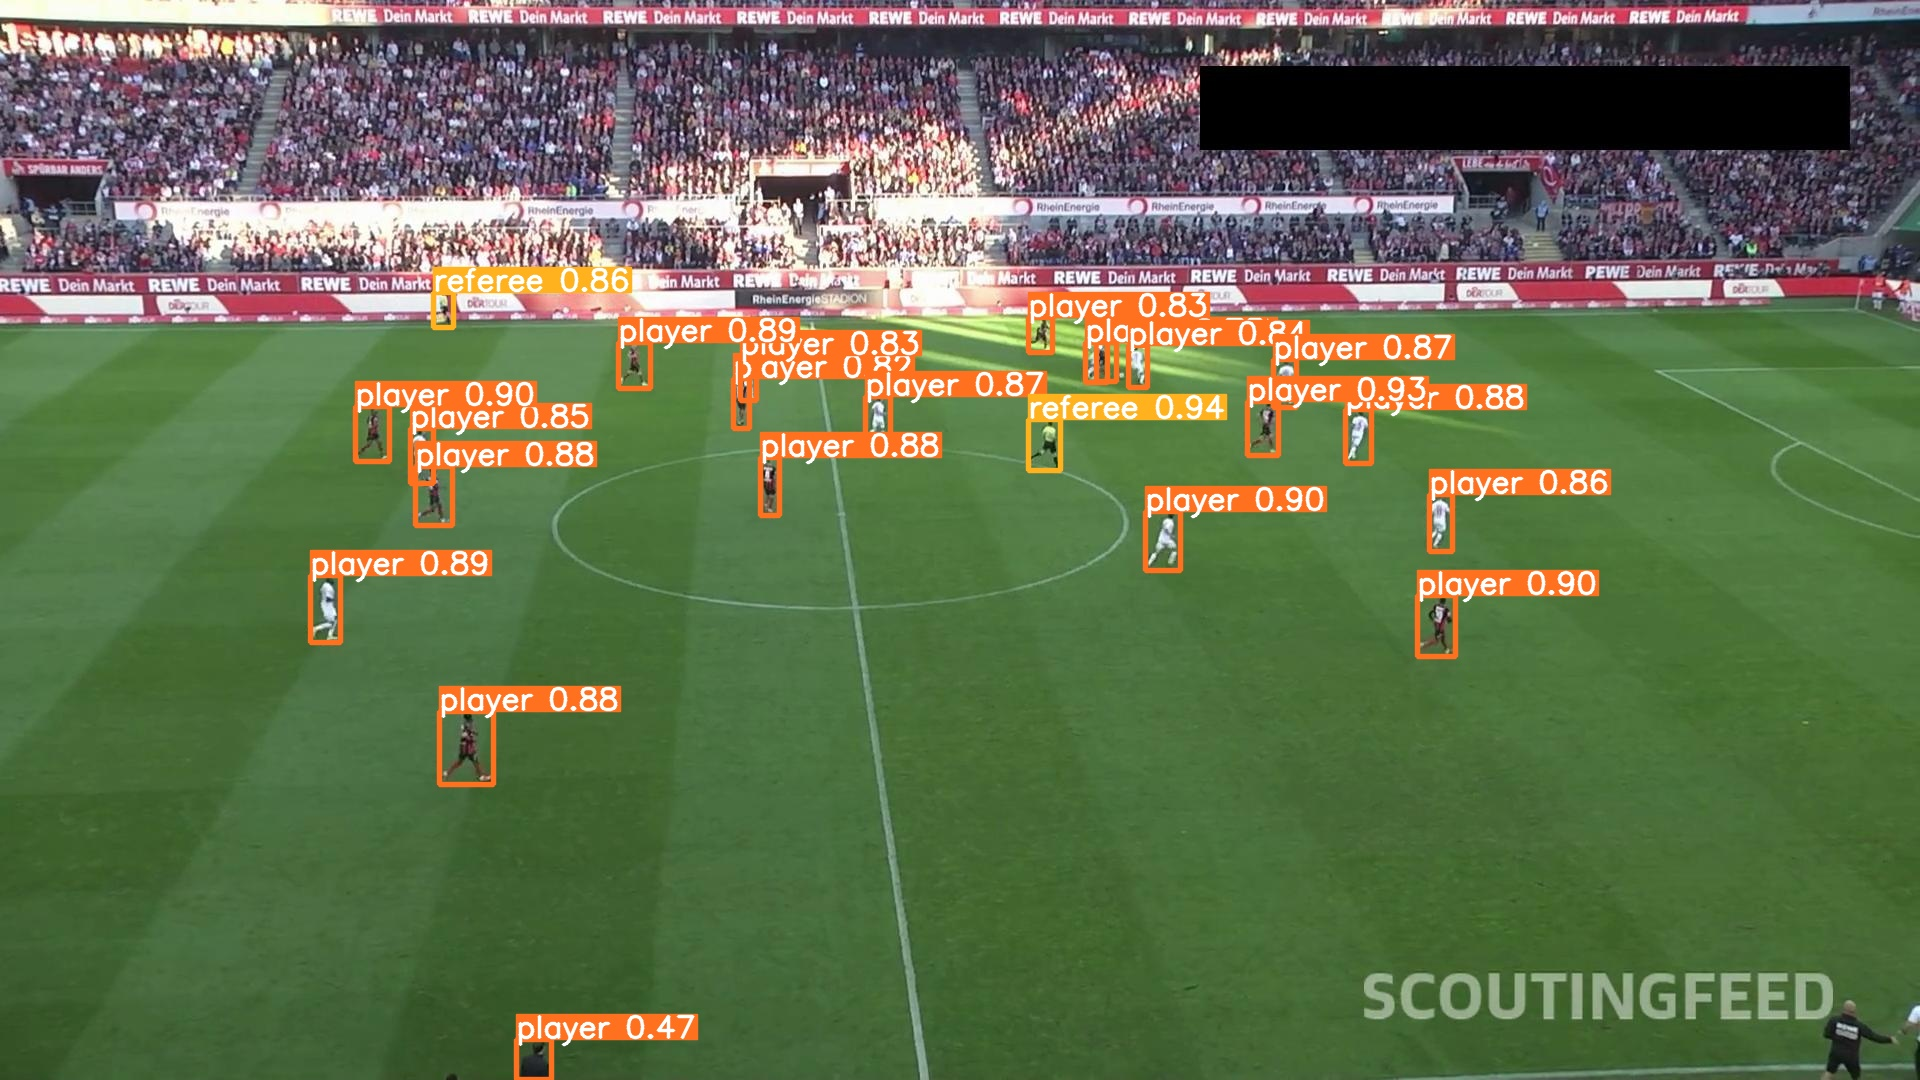

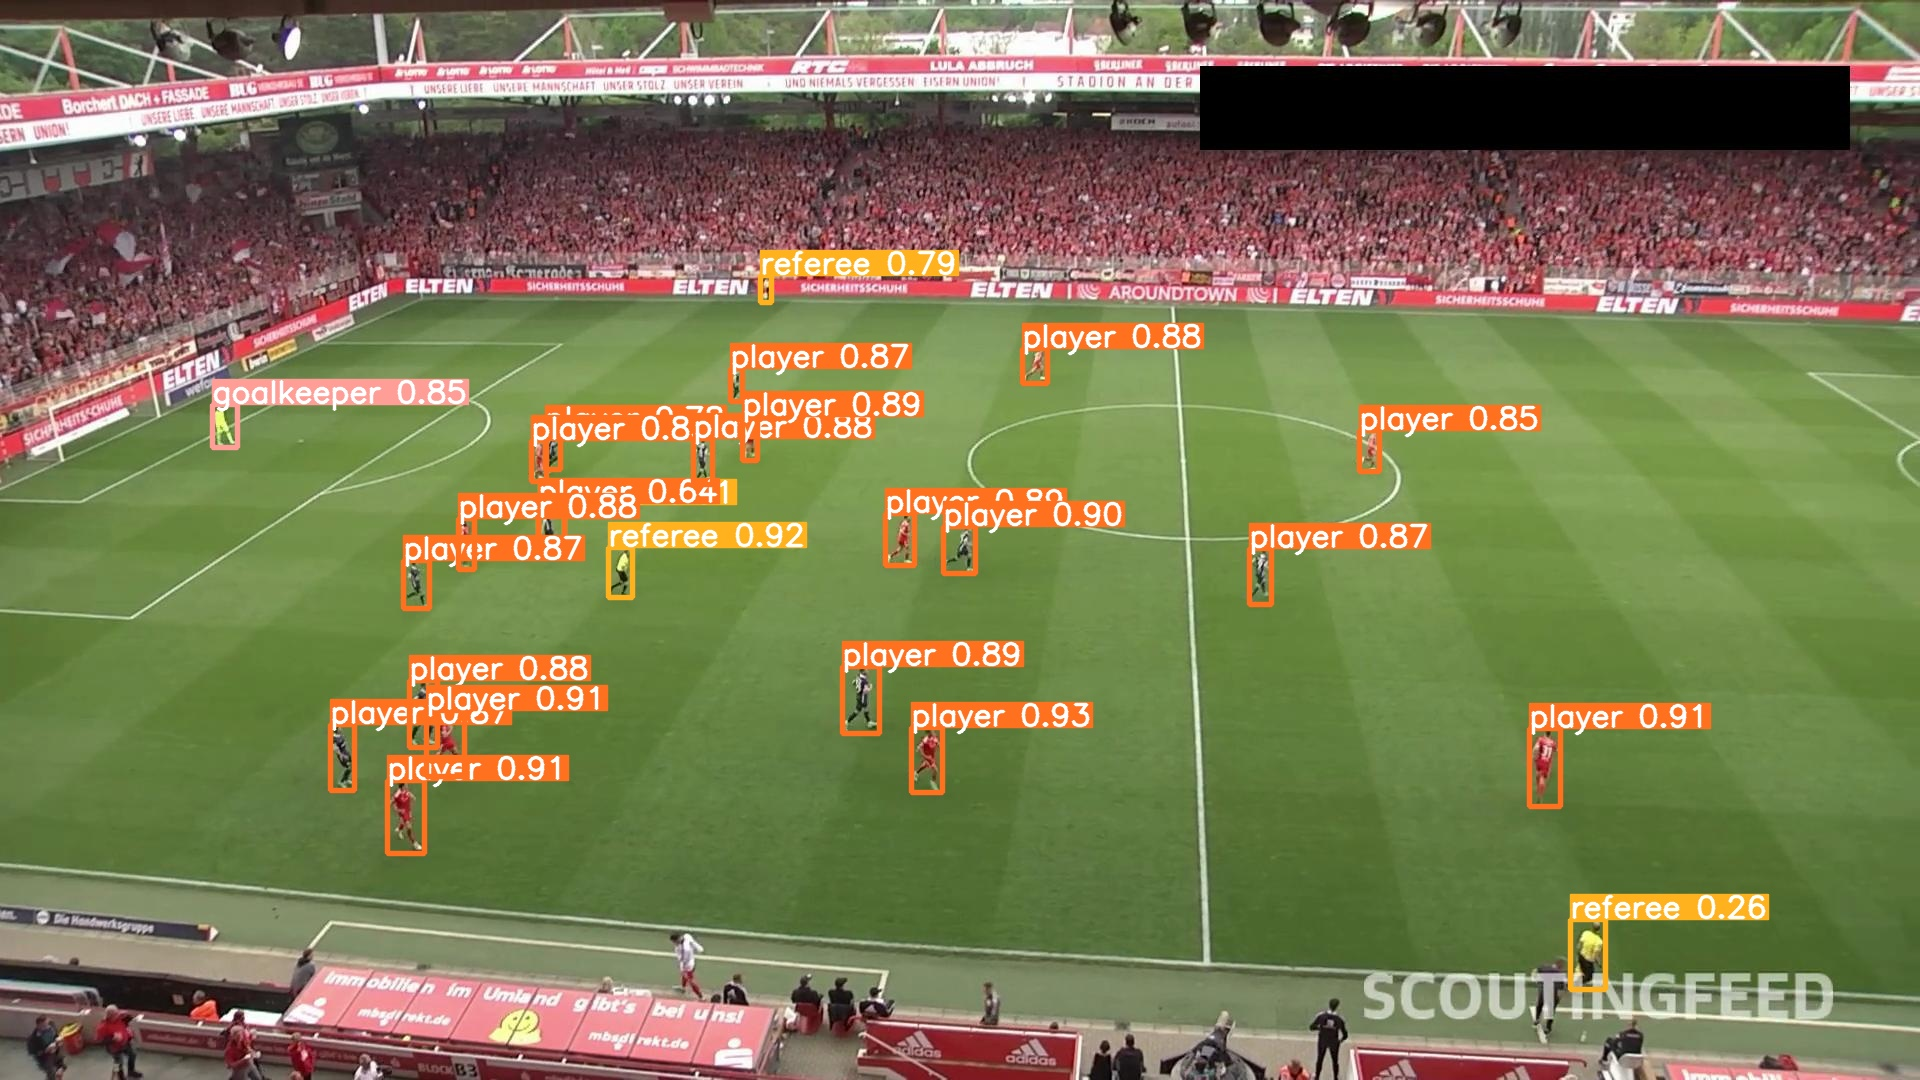

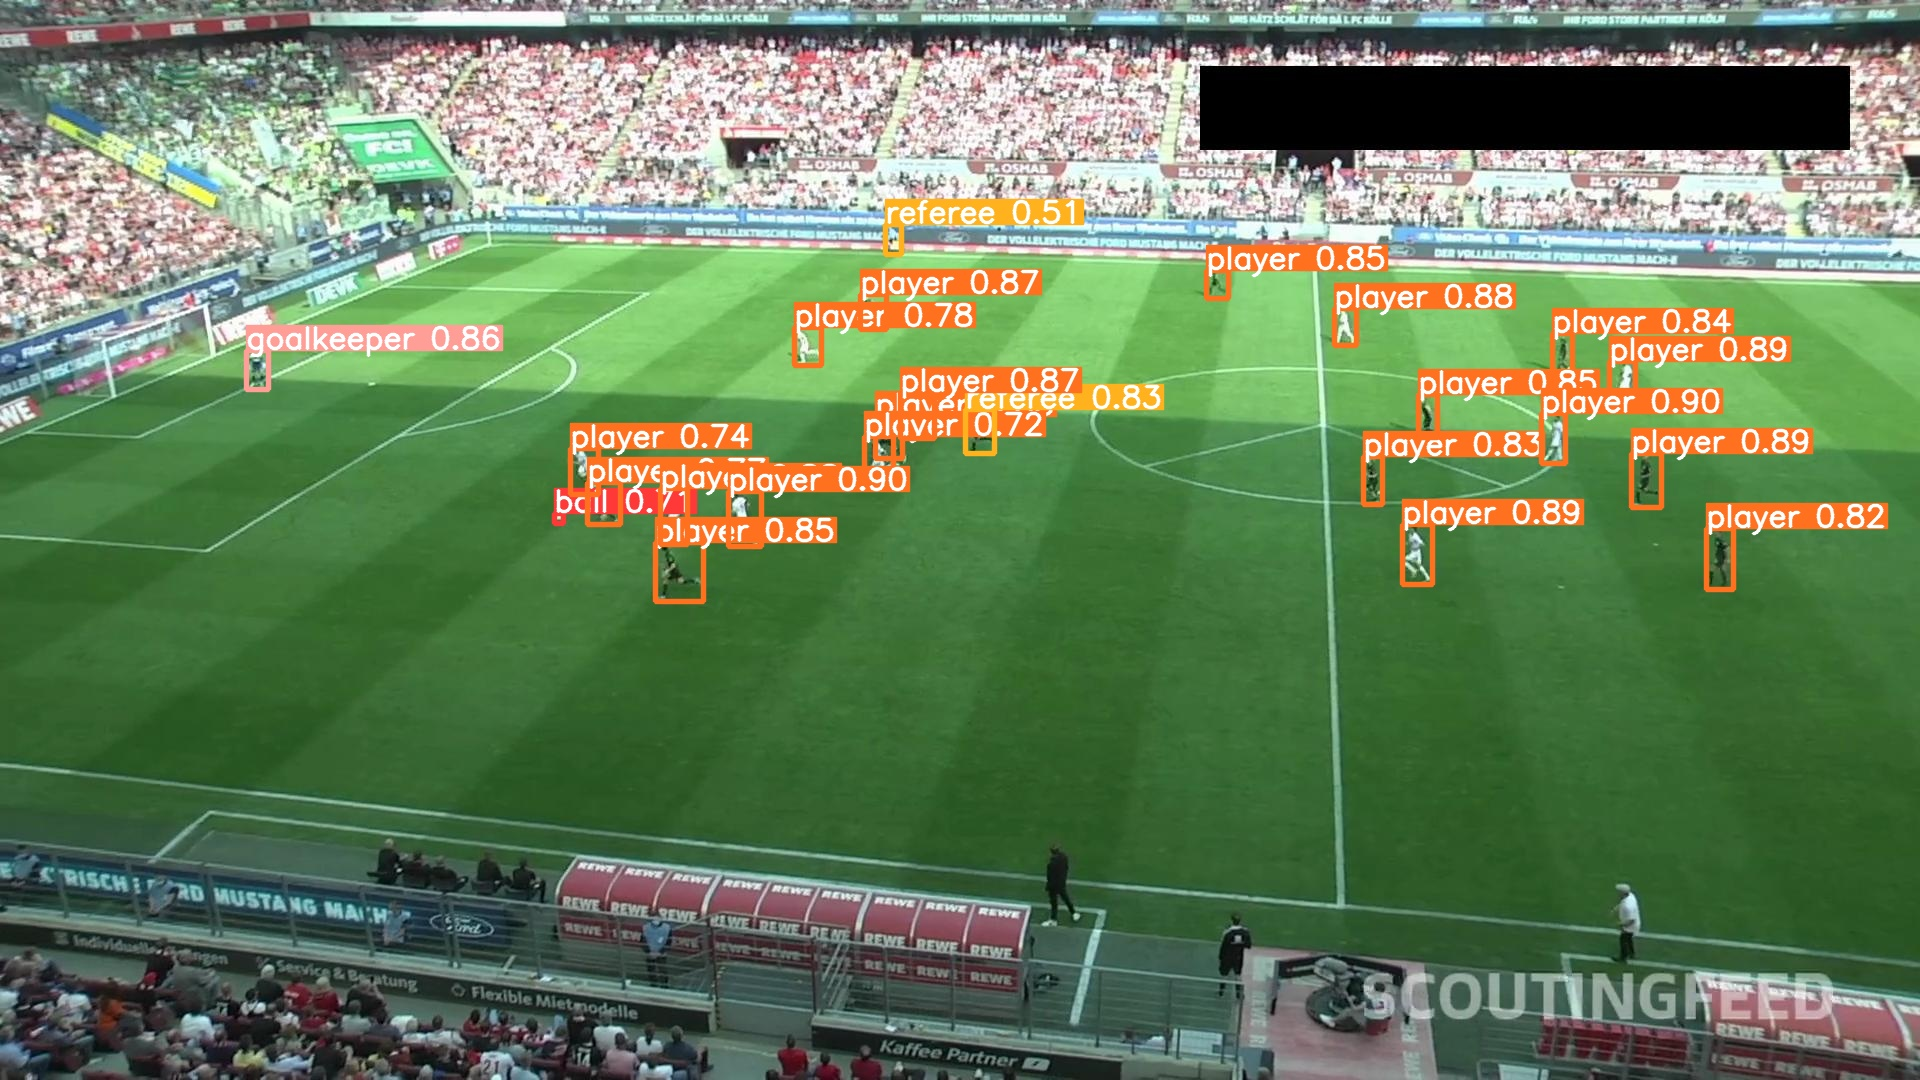

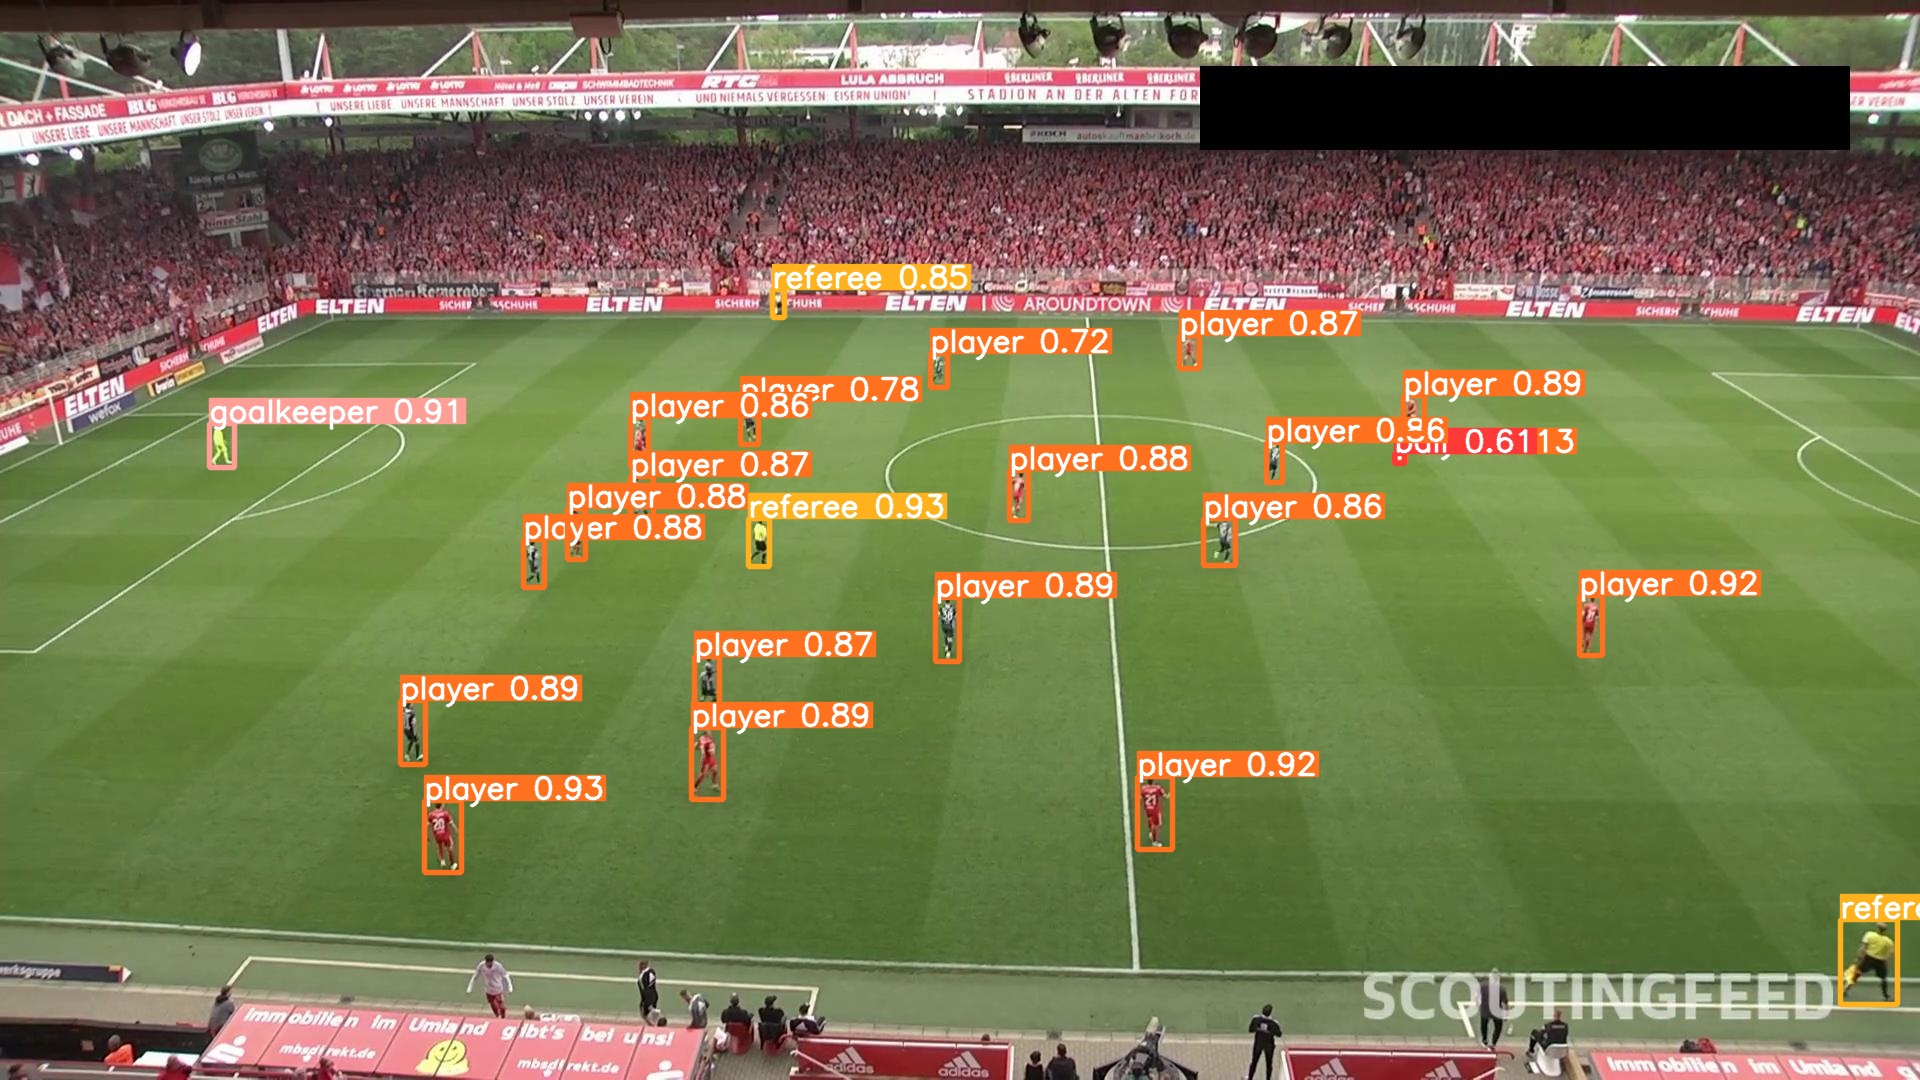

In [43]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))